In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0].shape

(32, 32, 3)

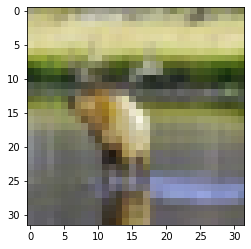

In [6]:
plt.imshow(x_train[89])

In [7]:
x_train[0].max()

255

In [8]:
x_train = x_train/255

In [9]:
x_test = x_test/255

In [10]:
x_test.shape

(10000, 32, 32, 3)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_cat_train = to_categorical(y_train, num_classes=10)

In [13]:
y_cat_test = to_categorical(y_test, num_classes=10)

In [14]:
y_train[0]

array([6], dtype=uint8)

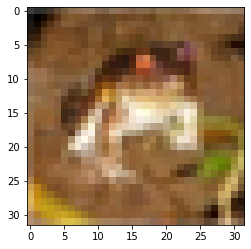

In [15]:
plt.imshow(x_train[0])

In [16]:
from tensorflow.keras.models import Sequential

In [17]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [18]:
model = Sequential()

model.add(Conv2D(filters = 32,kernel_size = (4,4),input_shape = (32,32,3),activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32,kernel_size = (4,4),input_shape = (32,32,3),activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))

model.add(Dense(10,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
             metrics = ['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [22]:
model.fit(x_train, y_cat_train, epochs = 15, validation_data = (x_test,y_cat_test), callbacks = [early_stop])

Epoch 1/15
1563/1563 [==============================] - 66s 42ms/step - loss: 1.4748 - accuracy: 0.4697 - val_loss: 1.2618 - val_accuracy: 0.5491
Epoch 2/15
1563/1563 [==============================] - 62s 40ms/step - loss: 1.1555 - accuracy: 0.5919 - val_loss: 1.0917 - val_accuracy: 0.6169
Epoch 3/15
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0028 - accuracy: 0.6500 - val_loss: 1.0375 - val_accuracy: 0.6434
Epoch 4/15
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8877 - accuracy: 0.6907 - val_loss: 0.9974 - val_accuracy: 0.6538
Epoch 5/15
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8003 - accuracy: 0.7212 - val_loss: 0.9474 - val_accuracy: 0.6787
Epoch 6/15
1563/1563 [==============================] - 62s 39ms/step - loss: 0.7108 - accuracy: 0.7519 - val_loss: 0.9233 - val_accuracy: 0.6835
Epoch 7/15
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6391 - accuracy: 0.7768 - val_loss: 0.9665 -

In [23]:
 metrics = pd.DataFrame(model.history.history)

In [24]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.474795,0.46972,1.261754,0.5491
1,1.155541,0.59192,1.091730,0.6169
2,1.002807,0.65004,1.037528,0.6434
3,0.887722,0.69070,0.997359,0.6538
4,0.800257,0.72120,0.947385,0.6787
5,0.710751,0.75186,0.923277,0.6835
6,0.639058,0.77676,0.966516,0.6707
7,0.568980,0.80102,0.946951,0.6940


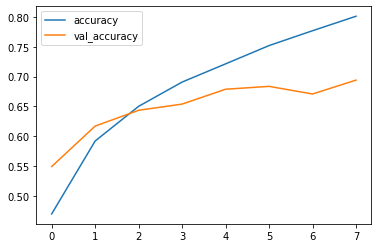

In [25]:
metrics[['accuracy','val_accuracy']].plot()

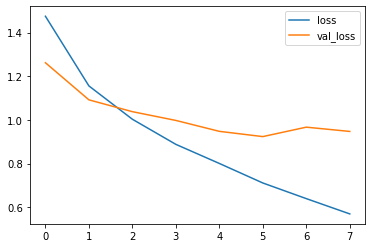

In [26]:
metrics[['loss','val_loss']].plot()

In [27]:
model.evaluate(x_test, y_cat_test,verbose = 0)

[0.9469512701034546, 0.6940000057220459]

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
predictions = np.argmax(model.predict(x_test),axis=1)

In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72      1000
           1       0.83      0.80      0.81      1000
           2       0.60      0.59      0.59      1000
           3       0.57      0.42      0.49      1000
           4       0.63      0.66      0.65      1000
           5       0.60      0.60      0.60      1000
           6       0.70      0.83      0.76      1000
           7       0.73      0.75      0.74      1000
           8       0.78      0.81      0.79      1000
           9       0.70      0.79      0.74      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [31]:
confusion_matrix(y_test,predictions)

array([[688,  14,  53,  11,  27,   6,  20,  18, 109,  54],
       [ 23, 795,  16,   5,   2,   2,  11,   6,  23, 117],
       [ 53,   6, 592,  32,  94,  65,  81,  34,  20,  23],
       [ 12,  12, 100, 423,  83, 189,  98,  44,  15,  24],
       [ 20,   5,  66,  48, 659,  34,  67,  79,  15,   7],
       [ 12,   3,  79, 129,  50, 604,  41,  56,   7,  19],
       [  4,   6,  35,  36,  46,  18, 834,   7,   4,  10],
       [ 15,   3,  31,  35,  64,  65,  10, 749,   6,  22],
       [ 52,  29,  10,  10,  12,   9,   6,   7, 805,  60],
       [ 21,  80,  11,  10,   5,   9,  16,  24,  33, 791]])

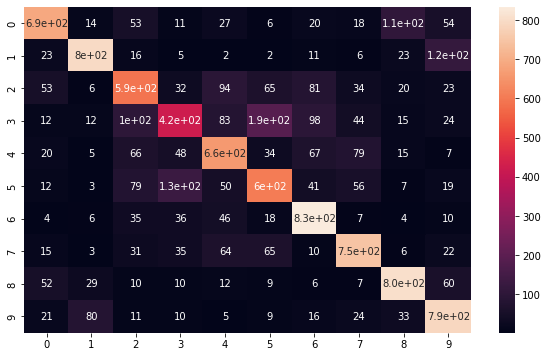

In [32]:
plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot = True)

In [33]:
my_image = x_test[16]

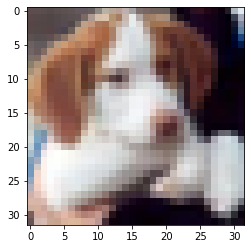

In [34]:
plt.imshow(my_image)

In [35]:
y_test[16]

array([5], dtype=uint8)

In [36]:
np.argmax(model.predict(my_image.reshape(1,32,32,3)),axis=1)

array([5])